In [654]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from math import sqrt

In [655]:
def load_dataset(csv_path, add_intercept=True, use_all_features=True, which_features=[2]):
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    if use_all_features:
        features = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=range(2, len(headers)))
    else:
        features = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=which_features)
    cycle_lives_real = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=[1])
    feature_names = headers[2:len(headers)]

    m = features.shape[0]
    if add_intercept:
        features = np.concatenate((np.ones([m, 1]), features),axis=1)
        feature_names = ['intercept'] + feature_names

    return features, cycle_lives_real, feature_names

In [656]:
def mean_percent_error(model, X, y):
    predicted_y = model.predict(X)
    residuals = predicted_y - y
    return (np.abs(residuals)/y).mean()*100

In [657]:
use_log_features = True
use_all_features = False
which_features = [2,3,4,21,22,24,25,39,40,48,49,63,65]

In [658]:
file_name = "../../data/battery_data/testing/cycles_2TO100_log.csv"
features_test, lives_test, feature_names = load_dataset(file_name, False, use_all_features, which_features)

file_name = "../../data/battery_data/training/cycles_2TO100_log.csv"
features_train, lives_train, feature_names = load_dataset(file_name, False, use_all_features, which_features)

# Train new model using best hyperparameters:
RF = RandomForestRegressor(n_estimators=70, max_depth=200, max_features='sqrt',random_state=50)
RF.fit(features_train,lives_train)

LR = LinearRegression()
LR.fit(features_train, lives_train)
lives_train

array([1852., 2160., 2237., 1434., 1709., 1074.,  636.,  870., 1054.,
        788.,  880.,  719.,  862.,  857.,  691.,  788.,  534.,  559.,
       1014., 1017.,  854.,  870.,  842.,  860.,  917.,  709.,  876.,
        731.,  757.,  742.,  703.,  704.,  648.,  617.,  625.,  966.,
       1051.,  702.,  651.,  616.,  599.,  300.,  148.,  438.,  335.,
        444.,  480.,  511.,  561.,  477.,  458.,  483.,  485.,  494.,
        487.,  461.,  502.,  489.,  513.,  527.,  495.,  461.,  471.,
        468.,  509.,  498.,  481.,  492.,  519.,  520.,  499.,  463.,
        535.,  478.,  465.,  459.,  499.,  429.,  466.,  462.,  457.,
        487.,  429.,  713.])

In [659]:
# predictions
lives_pred_RF = RF.predict(features_test)
lives_train_RF = RF.predict(features_train)
# predictions
lives_pred_LR = LR.predict(features_test)
lives_train_LR = LR.predict(features_train)

In [660]:
features_train.shape, features_test.shape

((84, 13), (40, 13))

In [661]:
#回归评价指标
# calculate MSE 均方误差
mse = mean_squared_error(lives_test,lives_pred_RF)
# calculate RMSE 均方根误差
rmse = sqrt(mean_squared_error(lives_test, lives_pred_RF))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(lives_test,lives_pred_RF)
#calculate R square
r_square=r2_score(lives_test,lives_pred_RF)
print(f'RF 均方误差: {mse}')
print(f'RF 均方根误差: {rmse}')
print(f'RF 平均绝对误差: {mae}')
print(f'RF R_square: {r_square}')

RF 均方误差: 42453.82353061224
RF 均方根误差: 206.04325645507603
RF 平均绝对误差: 141.99214285714288
RF R_square: 0.5427803930160773


In [662]:
# calculate MSE 均方误差
mse = mean_squared_error(lives_test,lives_pred_LR)
# calculate RMSE 均方根误差
rmse = sqrt(mean_squared_error(lives_test, lives_pred_LR))
#calculate MAE 平均绝对误差
mae=mean_absolute_error(lives_test,lives_pred_LR)
#calculate R square
r_square=r2_score(lives_test,lives_pred_LR)
print(f'LR 均方误差: {mse}')
print(f'LR 均方根误差: {rmse}')
print(f'LR 平均绝对误差: {mae}')
print(f'LR R_square: {r_square}')

LR 均方误差: 42802.67632406935
LR 均方根误差: 206.8880768049946
LR 平均绝对误差: 127.93995893212113
LR R_square: 0.5390233147636393


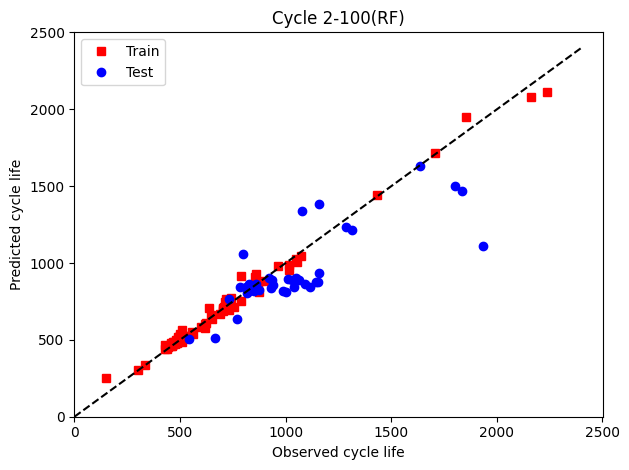

In [663]:
plt.figure()
plt.plot(lives_train,lives_train_RF,'rs',label='Train')
plt.plot(lives_test,lives_pred_RF,'bo',label='Test')
plt.plot([0,2400],[0,2400],'k--')
plt.ylabel('Predicted cycle life')
plt.xlabel('Observed cycle life')
plt.axis([0, 2501, 0, 2501])
plt.legend()
plt.title('Cycle 2-100(RF)')
plt.tight_layout()
plt.savefig('../../figures/battery_figs/rf_train_test.png')

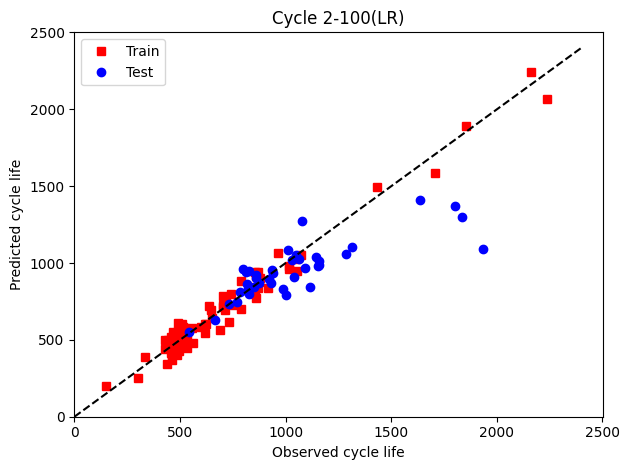

In [664]:
plt.figure()
plt.plot(lives_train,lives_train_LR,'rs',label='Train')
plt.plot(lives_test,lives_pred_LR,'bo',label='Test')
plt.plot([0,2400],[0,2400],'k--')
plt.ylabel('Predicted cycle life')
plt.xlabel('Observed cycle life')
plt.axis([0, 2501, 0, 2501])
plt.legend()
plt.title('Cycle 2-100(LR)')
plt.tight_layout()
plt.savefig('../../figures/battery_figs/lr_train_test.png')